In [1]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv("data/indian_restaurants_details_cleaned_data.csv")

In [7]:
df.head()

,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21.0,011 22486474 +91 9717806814,North Indian,300.0,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,77.284871,28.617732
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51.0,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500.0,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,73.184287,19.205887
2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,NaN,NaN,+91 9891828106,North Indian,250.0,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D...",77.291223,28.563034
3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,NaN,NaN,+91 9670005455,North Indian,300.0,"121, Amrit Kaur Market, Opposite New Delhi Rai...","{'Mon': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1...",False,False,False,NaN,77.218298,28.642411
4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78.0,+91 8442828284,"Italian, Pizza, Continental",500.0,"523, G.T Road, Howrah., Shibpur, Howrah","{'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",True,False,False,NaN,88.330708,22.577758


In [8]:
df.shape

(224520, 17)

In [9]:
df.columns

Index(['zomato_url', 'name', 'city', 'area', 'rating', 'rating_count',
       'telephone', 'cusine', 'cost_for_two', 'address', 'timings',
       'online_order', 'table_reservation', 'delivery_only', 'famous_food',
       'longitude', 'latitude'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   zomato_url         224520 non-null  object 
 1   name               224520 non-null  object 
 2   city               224520 non-null  object 
 3   area               224520 non-null  object 
 4   rating             144735 non-null  float64
 5   rating_count       142397 non-null  float64
 6   telephone          222930 non-null  object 
 7   cusine             223190 non-null  object 
 8   cost_for_two       220872 non-null  float64
 9   address            222734 non-null  object 
 10  timings            221556 non-null  object 
 11  online_order       224520 non-null  bool   
 12  table_reservation  224520 non-null  bool   
 13  delivery_only      224520 non-null  bool   
 14  famous_food        52526 non-null   object 
 15  longitude          224511 non-null  float64
 16  la

In [17]:
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values

famous_food          171994
rating_count          82123
rating                79785
cost_for_two           3648
timings                2964
address                1786
telephone              1590
cusine                 1330
latitude                  9
longitude                 9
zomato_url                0
area                      0
name                      0
city                      0
online_order              0
table_reservation         0
delivery_only             0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
cols_to_drop=[
    'famous_food',
    'telephone',
    'address',
    'timings',
    'zomato_url',
    'latitude',
    'longitude'
]
df_clean=df.drop(columns=cols_to_drop)

In [18]:
df_clean=df_clean.dropna(subset=['rating','rating_count','cost_for_two'])

In [19]:
df_clean['cusine']=df_clean['cusine'].fillna('Unknown')

In [20]:
df_clean.isnull().sum()

name                 0
city                 0
area                 0
rating               0
rating_count         0
cusine               0
cost_for_two         0
online_order         0
table_reservation    0
delivery_only        0
dtype: int64

In [21]:
df_clean.shape

(141198, 10)

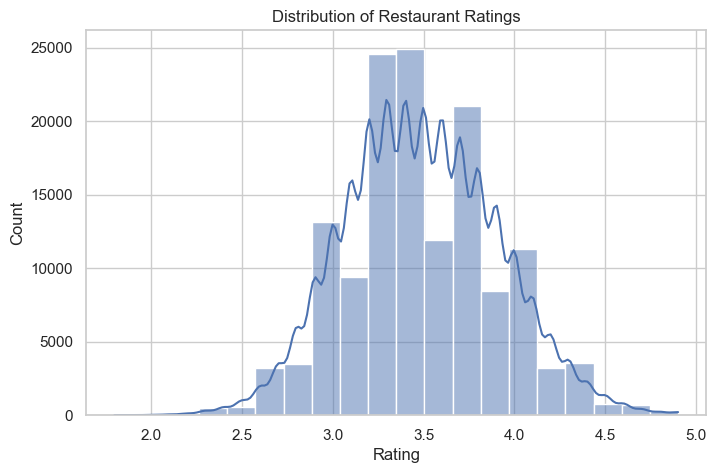

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['rating'],bins=20,kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

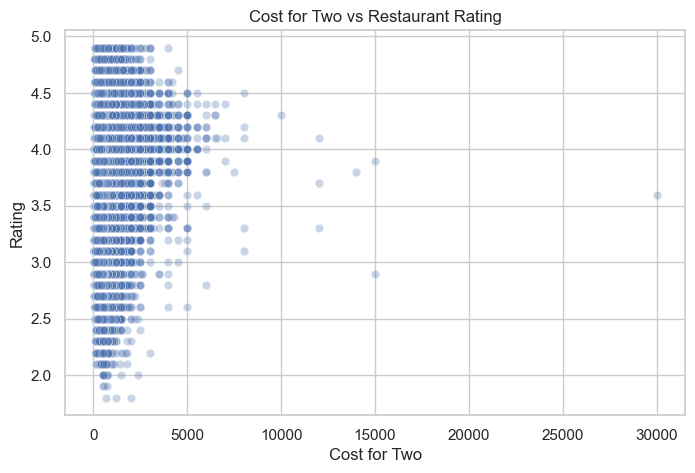

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df_clean['cost_for_two'],
    y=df_clean['rating'],
    alpha=0.3
)
plt.title("Cost for Two vs Restaurant Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

In [25]:
price_bins=[0,500,1000,2000,5000,df_clean['cost_for_two'].max()]
price_labels=['0-500','500-1000','1000-2000','2000-5000','5000+']

df_clean['price_range']=pd.cut(
    df_clean['cost_for_two'],
    bins=price_bins,
    labels=price_labels,
    include_lowest=True
)
avg_rating_by_price=(
    df_clean
    .groupby('price_range', observed=True)['rating']
    .mean()
    .reset_index()
)
avg_rating_by_price

,price_range,rating
0,0-500,3.432054
1,500-1000,3.570007
2,1000-2000,3.888168
3,2000-5000,3.980634
4,5000+,3.971739


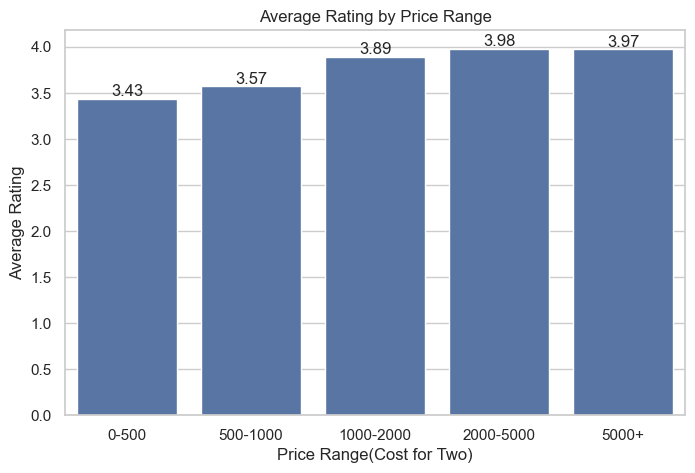

In [26]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(
    x='price_range',
    y='rating',
    data=avg_rating_by_price
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title("Average Rating by Price Range")
plt.xlabel("Price Range(Cost for Two)")
plt.ylabel("Average Rating")
plt.show()

In [27]:
df_clean.groupby('table_reservation', observed=True)['rating'].mean()

table_reservation
False    3.463301
True     4.025299
Name: rating, dtype: float64

In [28]:
df_clean.groupby('online_order', observed=True)['rating'].mean()

online_order
False    3.384541
True     3.553378
Name: rating, dtype: float64

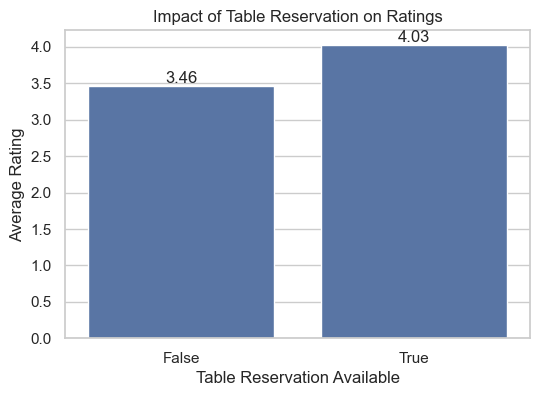

In [30]:
table_rating = (
    df_clean
    .groupby('table_reservation',observed=True)['rating']
    .mean()
    .reset_index()
)
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='table_reservation',
    y='rating',
    data=table_rating
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')

plt.title("Impact of Table Reservation on Ratings")
plt.xlabel("Table Reservation Available")
plt.ylabel("Average Rating")
plt.show()

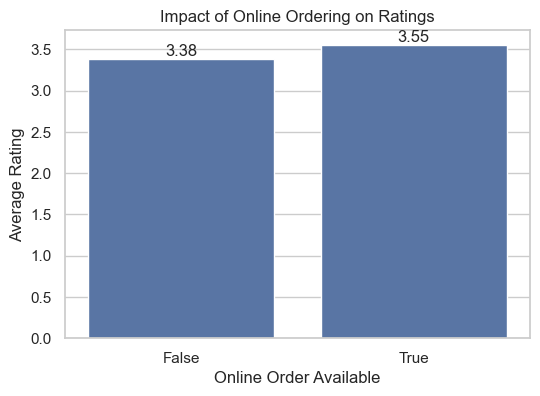

In [31]:
online_rating=(
    df_clean
    .groupby('online_order',observed=True)['rating']
    .mean()
    .reset_index()
)
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='online_order',
    y='rating',
    data=online_rating
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')

plt.title("Impact of Online Ordering on Ratings")
plt.xlabel("Online Order Available")
plt.ylabel("Average Rating")
plt.show()

In [32]:
city_stats=(
    df_clean
    .groupby('city',observed=True)
    .agg(
        avg_rating=('rating','mean'),
        restaurant_count=('name','count')
    )
    .reset_index()
)
city_stats['avg_rating']=city_stats['avg_rating'].round(2)
city_stats.head()

,city,avg_rating,restaurant_count
0,Agra,3.47,964
1,Ahmedabad,3.46,4247
2,Ajmer,3.46,311
3,Allahabad,3.47,521
4,Amravati,2.86,5


In [33]:
reliable_cities=city_stats[city_stats['restaurant_count']>=1000]
reliable_cities.shape

(23, 3)

In [34]:
top_cities=reliable_cities.sort_values(
    by='avg_rating',
    ascending=False
).head(10)
top_cities

,city,avg_rating,restaurant_count
7,Bengaluru,3.61,13175
16,Delhi NCR,3.52,23699
48,Mumbai,3.51,17802
69,Surat,3.48,1734
9,Bhubaneswar,3.47,1251
8,Bhopal,3.46,1320
1,Ahmedabad,3.46,4247
12,Coimbatore,3.46,1383
11,Chennai,3.46,7604
10,Chandigarh,3.46,2823


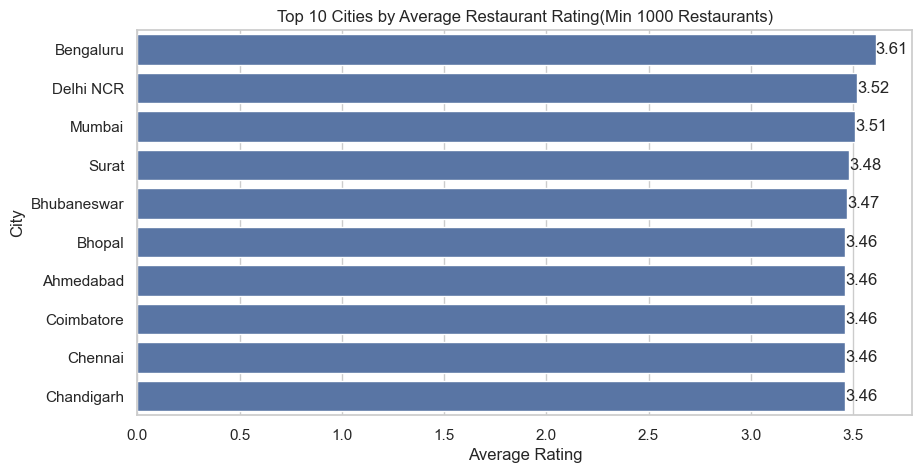

In [36]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
    x='avg_rating',
    y='city',
    data=top_cities
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.title("Top 10 Cities by Average Restaurant Rating(Min 1000 Restaurants)")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()

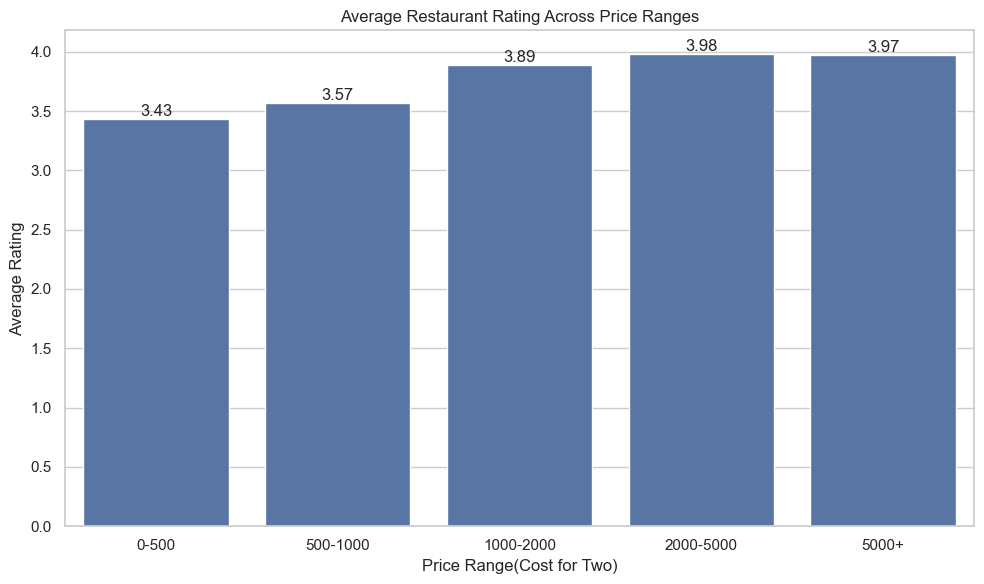

In [39]:
plt.figure(figsize=(10,6))
ax=sns.barplot(
    x='price_range',
    y='rating',
    data=avg_rating_by_price
)

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.title("Average Restaurant Rating Across Price Ranges")
plt.xlabel("Price Range(Cost for Two)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()